In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('src/merge_cmu.csv')

# Display the first few rows of the dataframe
print(df.head())

# Display basic information about the dataframe
print(df.info())

# Display summary statistics of the dataframe
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Display the column names
print(df.columns)

         movie_name  movie_date   box_office  runtime  \
0       marypoppins        1964  102272727.0    139.0   
1  mysteriousisland        1982          NaN    100.0   
2            juarez        1939          NaN    125.0   
3   thegreatsantini        1979    4702575.0    115.0   
4         thecastle        1968          NaN     88.0   

                             language                 countries  \
0                    English Language  United States of America   
1                   Standard Mandarin                 Hong Kong   
2  English Language, Spanish Language  United States of America   
3                    English Language  United States of America   
4                     German Language              West Germany   

                                              genres       author_book  \
0  Children's/Family, Musical, Fantasy, Comedy, D...     P. L. Travers   
1  Action/Adventure, Wuxia, Martial Arts Film, Ch...       Jules Verne   
2  Costume drama, Biographical f

In [52]:
# Separate the genres by each comma and explode the list into separate rows
df['genres'] = df['genres'].str.split(', ')
df_exploded = df.explode('genres')

# Group by 'genres' and count the number of movies in each genre
genre_counts = df_exploded['genres'].value_counts()

# Get the unique genres from the dataframe
unique_genres = df_exploded['genres'].unique()

# Write the genres to a text file
with open('genres.txt', 'w') as file:
    for genre in unique_genres:
        file.write(f"{genre}\n")

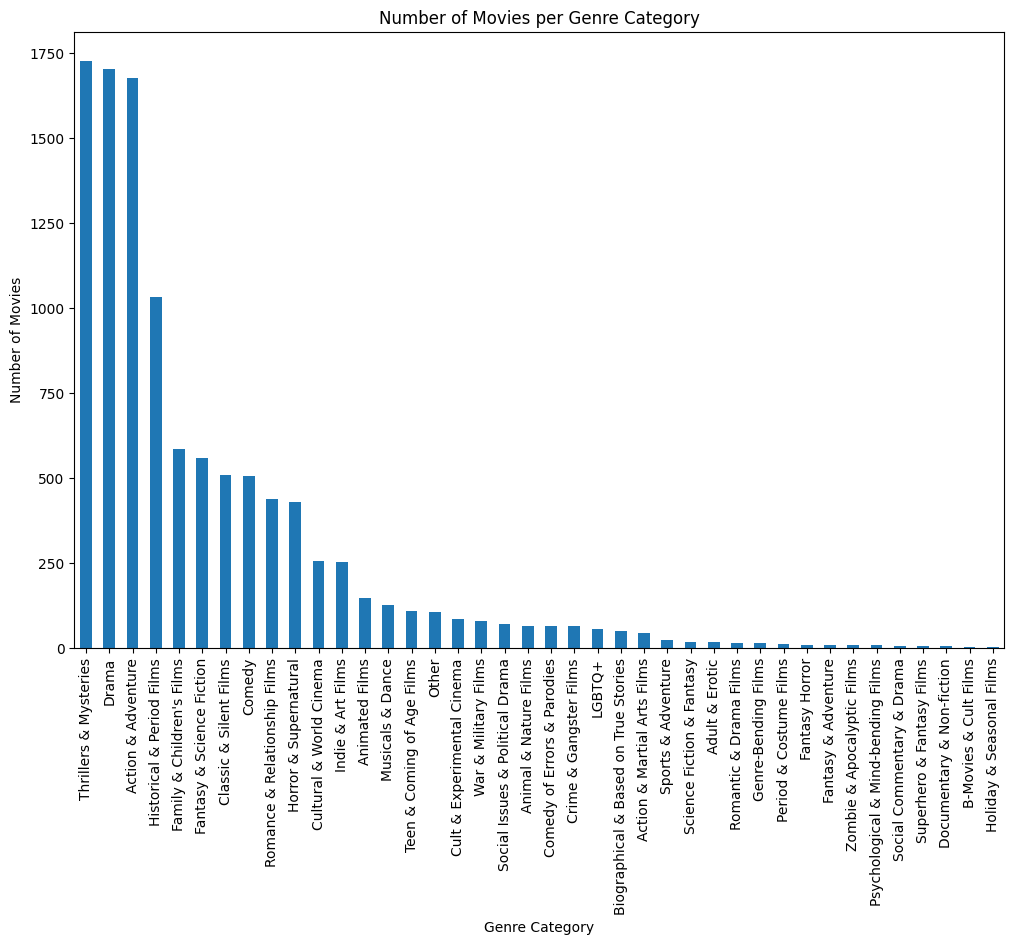

In [53]:
# Define the mapping of genres to broader movie categories
genre_categories = {
    "Family & Children's Films": [
        "Children's/Family", "Family Film", "Children's Fantasy", "Family Drama", 
        "Children's", "Children's Entertainment", "Holiday Film", "Family-Oriented Adventure"
    ],
    "Fantasy & Science Fiction": [
        "Fantasy", "Fantasy Adventure", "Sword and sorcery", "Fantasy Comedy", 
        "Romantic fantasy", "Mythological Fantasy", "Science Fiction", "Sci-Fi Horror", 
        "Sci-Fi Adventure", "Space opera", "Alien Film", "Time travel", "Cyberpunk", "Steampunk", 
        "Werewolf fiction", "Natural disaster"
    ],
    "Comedy": [
        "Comedy", "Comedy film", "Comedy-drama", "Slapstick", "Tragicomedy", "Screwball comedy", 
        "Black comedy", "Workplace Comedy", "Comedy of manners", "Comedy Thriller", "Fantasy Comedy", 
        "Political satire", "Musical comedy", "Comedy Western", "Sex comedy"
    ],
    "Drama": [
        "Drama", "Romantic drama", "Family Drama", "Marriage Drama", "Erotic Drama", 
        "Romantic fantasy", "Romantic comedy", "Heavenly Comedy", "Addiction Drama", "Medical fiction", 
        "Domestic Comedy", "Legal drama", "Childhood Drama", "Psychological drama", "Addiction Drama"

    ],
    "Action & Adventure": [
        "Action/Adventure", "Action", "Adventure", "Action Thrillers", "Adventure Comedy", 
        "Swashbuckler films", "Chase Movie", "Combat Films", "War film", "Heist", 
        "Caper story", "Western", "Epic Western", "Indian Western", "Baseball", 
        "Parkour in popular culture", "Escape Film", "Movie serial"
    ],
    "Historical & Period Films": [
        "Historical fiction", "Biographical film", "Costume drama", "Period piece", 
        "Historical drama", "Historical Epic", "History", "Historical drama", 
        "British Empire Film", "The Netherlands in World War II", "Film adaptation", 
        "Film à clef", "Roadshow theatrical release", "British New Wave", "Melodrama", 
        "Costume Horror", "Epic", "Archaeology", "Americana"
    ],
    "Musicals & Dance": [
        "Musical", "Animated Musical", "Dance", "Musical comedy", "Musical Drama", "Music", "Hip hop movies"
    ],
    "Horror & Supernatural": [
        "Horror", "Supernatural", "Horror Comedy", "Psychological horror", "Slasher", 
        "Creature Film", "Haunted House Film", "Monster", "Monster movie", 
        "Zombie Film", "Demonic child", "Natural horror films", "Plague", "Sexploitation"
    ],
    "Romance & Relationship Films": [
        "Romance Film", "Romantic drama", "Romantic comedy", "Family Drama", 
        "Marriage Drama", "Erotic Drama", "Romantic fantasy", "Romantic comedy", 
        "Heavenly Comedy"
    ],
    "Thrillers & Mysteries": [
        "Thriller", "Mystery", "Detective", "Crime Thriller", "Suspense", "Crime Fiction", 
        "Detective fiction", "Whodunit", "Crime Drama", "Crime Comedy", 
        "Psychological thriller", "Erotic thriller", "Neo-noir", "Future noir", "Spy", 
        "Glamourized Spy Film", "Remake", "Buddy film", "Legal drama", "Political thriller", "Action Thrillers",
        "Glamorized Spy Film"
    ],
    "Indie & Art Films": [
        "Indie", "Art film", "Experimental film", "Avant-garde", "Foreign legion", "Art house", 
        "Documentary", "New Hollywood", "Experimental film", "Cult", "Mockumentary"
    ],
    "Animated Films": [
        "Animated cartoon", "Animation", "Computer Animation", "Stop motion", "Anime"
    ],
    "Cultural & World Cinema": [
        "Chinese Movies", "World cinema", "Japanese Movies", "Bengali Cinema", 
        "Filipino Movies", "Bollywood", "The Netherlands in World War II", "Indian Western", "Americana"
    ],
    "Biographical & Based on True Stories": [
        "Biopic [feature]", "Docudrama", "Biography", "Hagiography", "Courtroom Drama"
    ],
    "Action & Martial Arts Films": [
        "Wuxia", "Martial Arts Film", "Samurai cinema", "Sword and Sandal", 
        "Action Thrillers", "Kung Fu films", "Sword and sorcery films"
    ],
    "Crime & Gangster Films": [
        "Gangster Film", "Crime Fiction", "Crime Drama", "Blaxploitation", "Heist", 
        "Caper story", "Gangster movie", "Prison film", "B-movie", "Crime Comedy", "Caper story", "Prison"
    ],
    "War & Military Films": [
        "War film", "Anti-war", "Military fiction", "Combat Films", "Cold War", 
        "Revisionist Western", "Cavalry Film", "The Netherlands in World War II", "Disaster", 
        "Propaganda film", "Doomsday film", "Anti-war film"
    ],
    "Comedy of Errors & Parodies": [
        "Parody", "Comedy of Errors", "Satire", "Black comedy", "Screwball comedy", 
        "Comedy of manners", "Comedy Thriller", "Fantasy Comedy", "Sex comedy", 
        "Parody", "Sexploitation", "Domestic Comedy"
    ],
    "Fantasy & Adventure": [
        "Fantasy", "Fantasy Adventure", "Sword and sorcery", "Fantasy Comedy", "Adventure", 
        "Fairy tale", "Fantasy Drama"
    ],
    "Cult & Experimental Cinema": [
        "Cult", "Avant-garde", "Experimental film", "Surrealism", "Absurdism", 
        "Kafkaesque", "Expressionism", "Sexploitation", "Film noir", "Nan"
    ],
    "Documentary & Non-fiction": [
        "Documentary", "Educational", "Archives and records", "Political cinema", "Anthology", "Natural disaster"
    ],
    "Teen & Coming of Age Films": [
        "Coming of age", "Teen", "Juvenile Delinquency Film", "School story", "Slice of life story",
        "Childhood Drama"
    ],
    "Science Fiction & Fantasy": [
        "Science Fiction", "Sword and sorcery", "Mythological Fantasy", "Fantasy Adventure", 
        "Space opera", "Cyberpunk", "Alien invasion", "Sci-Fi Horror", "Dystopia", "Werewolf fiction"
    ],
    "Social Issues & Political Drama": [
        "Political drama", "Political thriller", "Social problem film", "Political cinema", 
        "Feminist Film", "Christian film", "Social commentary", "Addiction Drama", "Anti-war film"
    ],
    "Holiday & Seasonal Films": [
        "Christmas movie", "Holiday Film"
    ],
    "Psychological & Mind-bending Films": [
        "Psychological thriller", "Existentialism", "Surrealism", "Psychological horror", 
        "Mind-bending film", "Heavenly Comedy"
    ],
    "Superhero & Fantasy Films": [
        "Superhero movie", "Superhero"
    ],
    "Genre-Bending Films": [
        "Hybrid Western", "Action Comedy", "Fantasy Drama", "Horror Comedy", "Sci-Fi Adventure", 
        "Road movie", "Epic Western"
    ],
    "Social Commentary & Drama": [
        "Social problem film", "Feminist Film", "Kitchen sink realism", "Slice of life", "Tragicomedy", "Albino bias"
    ],
    "B-Movies & Cult Films": [
        "B-movie", "Horror B-movie", "Grindhouse", "Sexploitation", "Caper story", "B-Western", 
        "Reboot", "Sexploitation"
    ],
    "Romantic Fantasy & Fiction": [
        "Romantic fantasy", "Fantasy romance"
    ],
    "Animal & Nature Films": [
        "Animal Picture", "Jungle Film", "Nature documentary", "Natural disaster"
    ],
    "Period & Costume Films": [
        "Costume drama", "Period piece", "Historical drama", "Costume Adventure", "Epic",
        "Costume Horror"
    ],
    "Classic & Silent Films": [
        "Black-and-white", "Silent film", "Pre-Code", "Film noir"
    ],
    "Cyber & Digital Films": [
        "Cyberpunk", "Digital drama", "Computer Animation"
    ],
    "Romantic & Drama Films": [
        "Romantic drama", "Family Drama", "Tragedy"
    ],
    "Espionage & Spy Films": [
        "Spy", "Glamourized Spy Film", "Political thriller", "Glamorized Spy Film"
    ],
    "Zombie & Apocalyptic Films": [
        "Zombie Film", "Apocalyptic and post-apocalyptic fiction", "Doomsday film"
    ],
    "Fantasy Horror": [
        "Fantasy Horror", "Gothic Film"
    ],
    "Psychological & Horror Thriller": [
        "Psychological thriller", "Crime thriller"
    ],
    "Cult Classics & Experimental Cinema": [
        "Cult", "Experimental film"
    ],
    "Historical Epics": [
        "Historical Epic", "Period drama"
    ],
    "Epic Western": [
        "Epic Western", "Revisionist Western"
    ],
    "Sports & Adventure": [
        "Sports", "Baseball", "Horse racing", "Stoner film", "Beach Film", "Parkour in popular culture"
    ],
    "LGBTQ+": [
        "LGBT", "Gay", "Gay Interest", "Gay Themed", "LGBT", "Gay pornography"
    ],
    "Adult & Erotic": [
        "Erotica", "Adult", "Softcore Porn", "Erotic Drama", "Sex comedy", "Sexploitation"
    ],
    "Other": [
        "Ensemble Film", "Airplanes and airports", "Star vehicle", "Television movie", 
        "Short Film", "Psycho-biddy", "Female buddy film", "nan", ""
    ]
}


# Count the number of movies per genre category
category_counts = df_exploded['genres'].map(lambda x: next((k for k, v in genre_categories.items() if x in v), 'Other')).value_counts()

# Plot the number of movies per genre category
plt.figure(figsize=(12, 8))
category_counts.plot(kind='bar')
plt.title('Number of Movies per Genre Category')
plt.xlabel('Genre Category')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90)
plt.show()